In [2]:
# Gute Fragestellung für datascience Projekt (Sportify)
# Gibt es einen Zusammenhang zwischen eigenen Musikgeschmack und der Geschmack der anderen?

# Importieren der benötigten Bibliotheken
import sys
import os as os
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials


# Variablen und Funktionsdeklarationen

Um mit spotipy auf die Daten zugreiffen zu können, müssen `CLIENT_ID` und `CLIENT_SECRET` zwingendermassen gesetzt sein. Die Variablen `USERSANGEETHS` und `USERSTIAFEN` notwendig da wir mit der Spotipy methode `user_playlist` arbeiten.

In [3]:
CLIENT_ID = "082b3dd7a97642d49b60a647673caa75"
CLIENT_SECRET = "276e4715f8a14a34a7622c0105a8588c"
USERSANGEETHS = "qme120m1x3bg2wrtw3haiiyrb"
USERSTIAFEN = "stiafen"

client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) #spotify object to access API

In [4]:
# get all playlists of a user
def get_playlists(user):
    playlists = sp.user_playlists(user)
    playlist_ids = []
    while playlists:
        for i, playlist in enumerate(playlists['items']):
            playlist_ids.append(playlist['id'])
        if playlists['next']:
            playlists = sp.next(playlists)
        else:
            playlists = None
    return playlist_ids

In [5]:
playlistsSangeeths = get_playlists(USERSANGEETHS)
playlistsTiafen = get_playlists(USERSTIAFEN)

# get the name of the playlists, will later be used to print all available playlists for a user
def get_playlist_name(user, playlist_id):
    playlist = sp.user_playlist(user, playlist_id)
    return playlist['name'], playlist['id']


In [6]:
#Funktion welche mittels user und playlist ID alle Tracks für eine Playlist ausgibt
def get_playlist_tracks(user, playlist_id):
    results = sp.user_playlist_tracks(user, playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks


In [7]:
#Funktion welche mittels user und playlist ID alle Tracks für eine Playlist ausgibt
def get_playlist_tracks_artists(user, playlist_id):
    results = sp.user_playlist_tracks(user, playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

Um nun die ID der playlist zu erhalten, in welcher wir unsere Lieblingssongs gespeichert haben nutzen wir die zuvor definierte Funktion `get_playlist_name` welche über das Resultat der Funktion `get_playlists` für den jeweiligen Benutzer läuft.
Um die Übersicht zu behalten haben wir unsere Playlists *Fav Songs "NAME"* genannt

In [8]:
for playlist in playlistsSangeeths:
    print(get_playlist_name(USERSANGEETHS, playlist))

for playlist in playlistsTiafen:
    print(get_playlist_name(USERSTIAFEN, playlist))

('Fav Songs Sangeeths', '2E7GAf1h3F19ezc18w1NpZ')
('Tamil Vibes', '64Lq6W07GIOs087K88iOzT')
('Arabic  Vibes', '1Rr83zHLDULxQDbC9taydm')
('Albanien Vibes', '6jyy1HUool6rj0xWLVsAPC')
('UK DRILL ', '5ycwKESGY1Z71ftYWmTVJs')
('Baba Vibes', '67a5HCEjwm4aXvjPVoxoAX')
('Fav Songs Stiafen', '0ekbyk9EKkCf4MBjrQoM2D')
('Favorite Songs', '4DeCJm3aeeb0TTdthf8MGY')
('Caterpillar (feat. Eminem & King Green)', '1JKSl9B6hJNCGFs9FdOq8I')
('Meine Playlist Nr.\xa034', '3uBDJVShkGJKFxPNnjC7IL')
('Dein Mixtape\xa06 - ZUSAMMENGESTELLT FÜR STIAFEN:21.06.19', '48I13UCIzloZpyRE23zwIa')
('Mixtape 3', '2jnqcj5CxaBLHjzVafdmce')
('Oldschool', '4RjDNPzba04zlAan0a4bTE')


In [9]:
#Variablen für Playlists Sangeeths und Stiafen
favoritplaylistSangeeths = "2E7GAf1h3F19ezc18w1NpZ"
favoritplaylistStiafen = "0ekbyk9EKkCf4MBjrQoM2D"


# Für Beide User wird eine Dataframe mit allen Tracks erstellt
tracksSangeeths = get_playlist_tracks(USERSANGEETHS, favoritplaylistSangeeths)
tracksSangeeths = pd.DataFrame(tracksSangeeths)

tracksStiafen = get_playlist_tracks(USERSTIAFEN, favoritplaylistStiafen)
tracksStiafen = pd.DataFrame(tracksStiafen)

In [10]:
# just put colomn track in a new dataframe
tracksSangeeths = tracksSangeeths['track']
tracksStiafen = tracksStiafen['track']
# get all the info in colomn track
tracksSangeeths = tracksSangeeths.apply(pd.Series)
tracksStiafen = tracksStiafen.apply(pd.Series)
tracksStiafen


#print("artist genres:", artist["genres"])

,album,artists,available_markets,disc_number,duration_ms,episode,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track,track_number,type,uri
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,1463703,False,False,{'isrc': 'DESR72036116'},{'spotify': 'https://open.spotify.com/track/3d...,https://api.spotify.com/v1/tracks/3ddAtoSripae...,3ddAtoSripaeASJeovlIsg,False,Symphony No. 3 in D Minor: VI. Langsam. Ruhevo...,26,https://p.scdn.co/mp3-preview/87233ea4f437e0c7...,True,6,track,spotify:track:3ddAtoSripaeASJeovlIsg
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,378733,False,False,{'isrc': 'DEE861700261'},{'spotify': 'https://open.spotify.com/track/1O...,https://api.spotify.com/v1/tracks/1Oo7XEqkrwif...,1Oo7XEqkrwifJn17aA0ocF,False,"Sechs Klavierstücke, Op. 118: II. Intermezzo i...",63,https://p.scdn.co/mp3-preview/34054c2ef25c45bb...,True,9,track,spotify:track:1Oo7XEqkrwifJn17aA0ocF
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, BB, B...",1,295218,False,False,{'isrc': 'DEN960100244'},{'spotify': 'https://open.spotify.com/track/3o...,https://api.spotify.com/v1/tracks/3o9br9LskOEb...,3o9br9LskOEbwc5irxfHqR,False,"Serenade for Strings in E Major, Op. 22, B. 52...",50,None,True,4,track,spotify:track:3o9br9LskOEbwc5irxfHqR
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,132120,False,False,{'isrc': 'HKI190055512'},{'spotify': 'https://open.spotify.com/track/5T...,https://api.spotify.com/v1/tracks/5TtmI9sfXw4V...,5TtmI9sfXw4VXco0PE21mV,False,"2 Aquarelles: Lento, ma non troppo",62,https://p.scdn.co/mp3-preview/53e4cd9c2b3f4a4c...,True,12,track,spotify:track:5TtmI9sfXw4VXco0PE21mV
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,407946,False,False,{'isrc': 'DEAD62004705'},{'spotify': 'https://open.spotify.com/track/6a...,https://api.spotify.com/v1/tracks/6aD8MeXrjHNz...,6aD8MeXrjHNz7YgrTLHhyA,False,"Serenade for Strings in E Minor, Op. 20: II. L...",38,https://p.scdn.co/mp3-preview/9638a58cd7378e33...,True,5,track,spotify:track:6aD8MeXrjHNz7YgrTLHhyA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,118200,False,False,{'isrc': 'USX761440301'},{'spotify': 'https://open.spotify.com/track/0B...,https://api.spotify.com/v1/tracks/0BgHDpDnFg1W...,0BgHDpDnFg1Wfm9r7XsWeG,False,Book I: Prelude and Fugue No. 1 in C Major BWV...,35,https://p.scdn.co/mp3-preview/8aabf7351a2e09f0...,True,1,track,spotify:track:0BgHDpDnFg1Wfm9r7XsWeG
364,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,965280,False,False,{'isrc': 'GBAYC0702035'},{'spotify': 'https://open.spotify.com/track/2J...,https://api.spotify.com/v1/tracks/2JzsHRzDT3kC...,2JzsHRzDT3kCokSu0ggZ8U,False,"Schumann: Piano Concerto in A Minor, Op. 54: I...",30,https://p.scdn.co/mp3-preview/a4ac5cbd82a3c6a8...,True,4,track,spotify:track:2JzsHRzDT3kCokSu0ggZ8U
365,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",1,329626,False,False,{'isrc': 'DEN961801830'},{'spotify': 'https://open.spotify.com/track/2P...,https://api.spotify.com/v1/tracks/2PD8ghbTwRy3...,2PD8ghbTwRy3tqQkXnMsjs,False,"Rêverie, L. 68",33,None,True,12,track,spotify:track:2PD8ghbTwRy3tqQk

In [11]:
#Get Audio features for all tracks in favorite Playlist
features = []
genres = []

#Falls lokale Kopie der Daten existiert wird diese verwendet
if not os.path.isfile('audiofeatures_stiafen.csv'):

    print(len(tracksStiafen["album"]))
    print(len(tracksStiafen))
    for uri in tracksStiafen['uri']:

        features = features+sp.audio_features(uri)

    audioFeaturesStiafen = pd.DataFrame(features)
    audioFeaturesStiafen['user'] = "Stiafen"
    #Extrahiere Genres aller Artists aus einem Track und füge sie als genre Feld an das Dataframe an
    for album in tracksStiafen["album"]:
        albumgenres = []

        for artist in album["artists"]:
            artistinfo = sp.artist(artist['uri'])
            artistgenres = artistinfo["genres"]
            albumgenres = albumgenres+artistgenres

        genres = genres+albumgenres


    genresStiafen = pd.DataFrame(genres)

    print(audioFeaturesStiafen)
    print(genresStiafen)
    audioFeaturesStiafen.to_csv('audiofeatures_stiafen.csv')
    genresStiafen.to_csv('genres_stiafen.csv')
else:
    audioFeaturesStiafen = pd.read_csv('audiofeatures_stiafen.csv')








if not os.path.isfile('audiofeatures_sangeeths.csv'):
    for uri in tracksSangeeths['uri']:
       features = features+sp.audio_features(uri)
    audioFeaturesSangeeths = pd.DataFrame(features)
    audioFeaturesSangeeths['user'] = "Sangeeths"
    audioFeaturesSangeeths.to_csv('audiofeatures_sangeeths.csv')
else:
    audioFeaturesSangeeths = pd.read_csv('audiofeatures_sangeeths.csv')

#Ausgabe zur Kontrolle
#audioFeaturesSangeeths

368
368
     danceability   energy  key  loudness  mode  speechiness  acousticness  \
0          0.0614  0.05800    2   -20.976     1       0.0418         0.918   
1          0.2990  0.00626    9   -30.923     1       0.0478         0.994   
2          0.0877  0.07630    9   -23.986     1       0.0429         0.645   
3          0.1760  0.05340   10   -27.626     1       0.0406         0.970   
4          0.4280  0.00300    0   -31.005     1       0.0709         0.995   
..            ...      ...  ...       ...   ...          ...           ...   
363        0.2840  0.01980    0   -37.475     1       0.0389         0.995   
364        0.2040  0.03310    9   -27.404     0       0.0387         0.975   
365        0.2790  0.01580    5   -29.738     1       0.0485         0.992   
366        0.3110  0.00295   11   -32.412     1       0.0383         0.996   
367        0.3460  0.10800    2   -22.473     0       0.0395         0.993   

     instrumentalness  liveness  valence    tempo      

In [25]:
genresStiafen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2257 entries, 0 to 2256
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       2257 non-null   object
dtypes: object(1)
memory usage: 17.8+ KB


# Visualisierungen
Da wir mit Machinelearning eine Klassifikation durchführen wollen, suchen wir bei der Visualisierung mittels Scatterplots nach möglichen Clustern.

In [12]:
#Beginn Visualisierungen
#Dataframe um mögliche Cluster zu finden
allAudioFeatures = audioFeaturesSangeeths.append(audioFeaturesStiafen)

C:\Users\Startklar\AppData\Local\Temp\ipykernel_19784\1352594401.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  allAudioFeatures = audioFeaturesSangeeths.append(audioFeaturesStiafen)


<AxesSubplot:xlabel='energy', ylabel='danceability'>

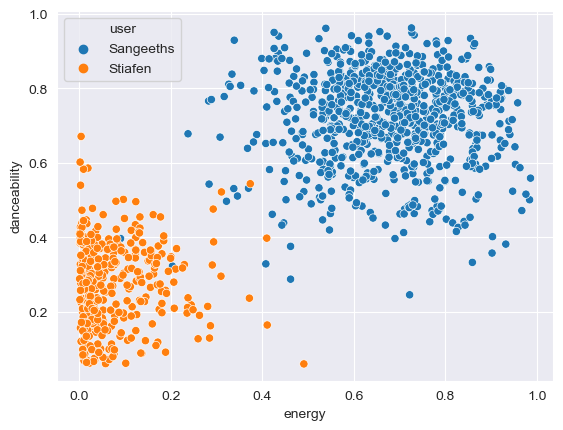

In [13]:
sns.scatterplot(data=allAudioFeatures, x="energy", y="danceability", hue="user")

<AxesSubplot:xlabel='tempo', ylabel='loudness'>

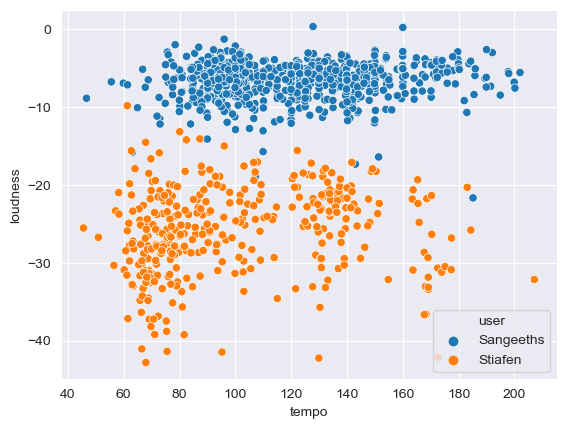

In [14]:
sns.scatterplot(data=allAudioFeatures, x="tempo", y="loudness", hue="user")

<AxesSubplot:xlabel='speechiness', ylabel='acousticness'>

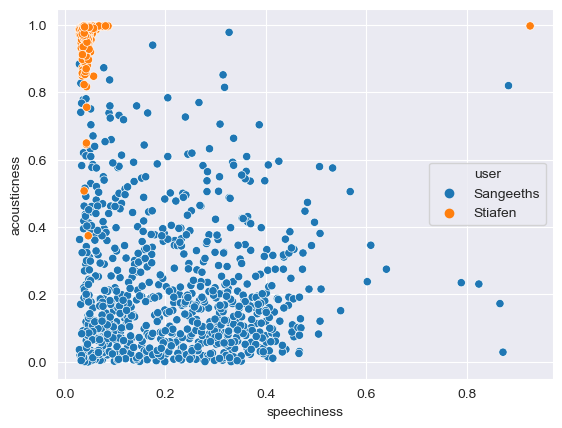

In [15]:
sns.scatterplot(data=allAudioFeatures, x="speechiness", y="acousticness", hue="user")

<AxesSubplot:xlabel='liveness', ylabel='instrumentalness'>

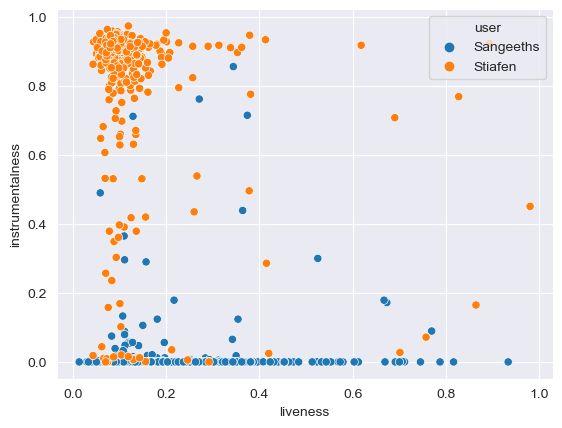

In [16]:
sns.scatterplot(data=allAudioFeatures, x="liveness", y="instrumentalness", hue="user")

<AxesSubplot:xlabel='energy', ylabel='loudness'>

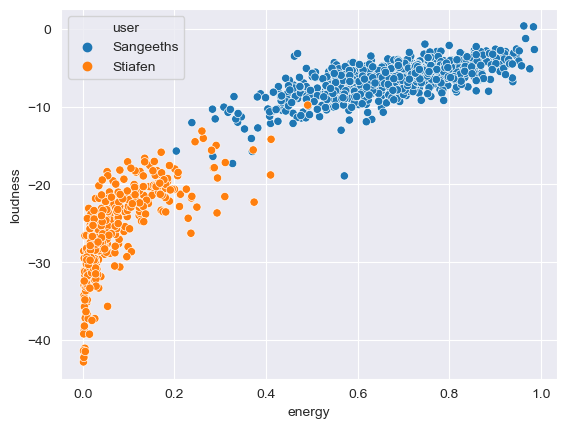

In [17]:
sns.scatterplot(data=allAudioFeatures, x="energy", y="loudness", hue="user")

<AxesSubplot:xlabel='tempo', ylabel='danceability'>

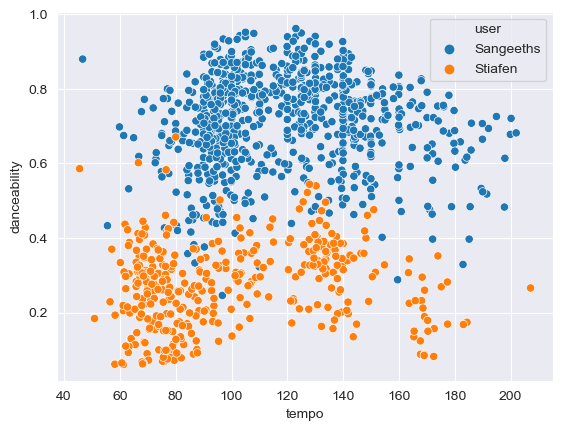

In [18]:
sns.scatterplot(data=allAudioFeatures, x="tempo", y="danceability", hue="user")

<AxesSubplot:xlabel='instrumentalness', ylabel='loudness'>

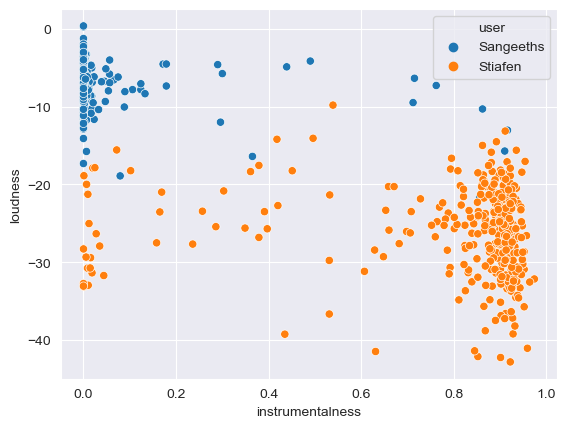

In [19]:
sns.scatterplot(data=allAudioFeatures, x="instrumentalness", y="loudness", hue="user")

<AxesSubplot:xlabel='liveness', ylabel='loudness'>

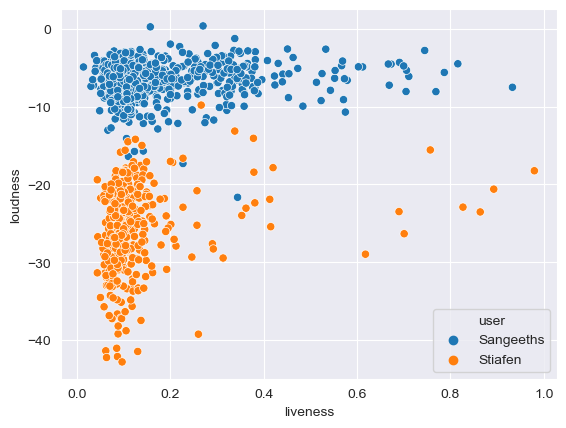

In [20]:
sns.scatterplot(data=allAudioFeatures, x="liveness", y="loudness", hue="user")

<AxesSubplot:xlabel='instrumentalness', ylabel='speechiness'>

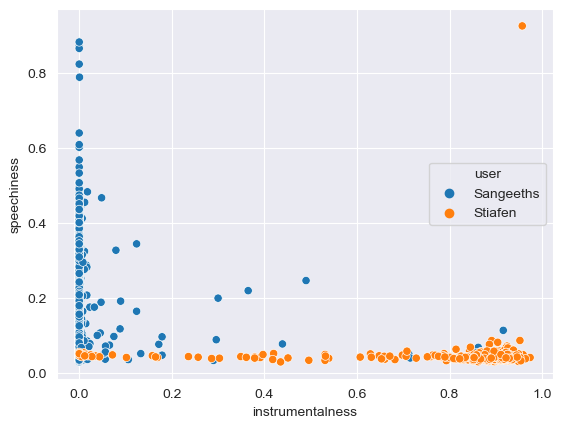

In [21]:
sns.scatterplot(data=allAudioFeatures, x="instrumentalness", y="speechiness", hue="user")

<AxesSubplot:xlabel='loudness', ylabel='danceability'>

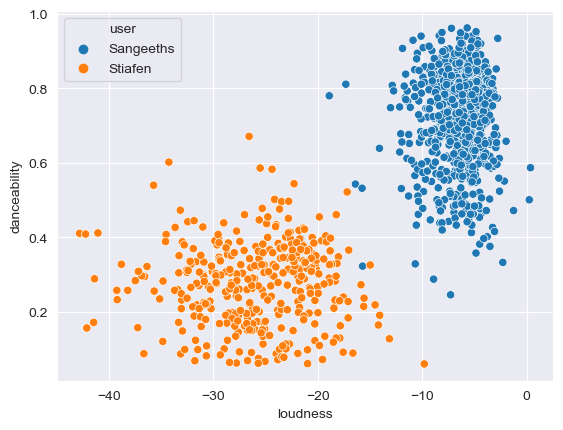

In [22]:
sns.scatterplot(data=allAudioFeatures, x="loudness", y="danceability", hue="user")